In [243]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
df = pd.read_csv("discrimination_data.csv",delimiter=';',header=None, index_col=None)
df

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73
1,individuals,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,...,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2
2,bodyparts,nose,nose,nose,rightear,rightear,rightear,leftear,leftear,leftear,...,tailbase,tail1,tail1,tail1,tail2,tail2,tail2,tailend,tailend,tailend
3,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
4,0,408.285,831.538,1.0,413.874,857.914,1.0,396.68,853.354,1.0,...,1.0,407.081,226.773,1.0,406.37,202.12,1.0,410.763,175.743,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,4577,758.655,312.516,1.0,747.942,329.695,1.0,738.043,316.328,1.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4582,4578,758.722,313.137,1.0,751.125,330.742,1.0,743.423,316.804,1.0,...,0.9990000128746033,202.526,746.134,0.8299999833106995,NaN,NaN,0.0,NaN,NaN,0.0
4583,4579,761.5,313.493,1.0,755.464,330.627,1.0,748.148,317.507,1.0,...,1.0,200.239,727.738,1.0,196.484,744.479,1.0,NaN,NaN,0.0
4584,4580,762.791,311.719,1.0,759.351,330.591,1.0,749.139,318.803,1.0,...,1.0,193.362,722.142,1.0,186.266,743.563,1.0,173.96,755.783,0.5189999938011169


In [109]:
#loading deeplabcut file directly from h5
dlc_output = pd.read_hdf('openfield_test.h5')

In [110]:
dlc_output

scorer    DeepCut_resnet50_openfieldOct30shuffle1_15001              \
bodyparts                                         snout               
coords                                                x           y   
0                                             75.861072   88.507002   
1                                             74.647148   86.439178   
2                                             73.194103   84.019596   
3                                             73.438760   80.511157   
4                                             72.886618   78.118725   
...                                                 ...         ...   
2325                                         348.309489  372.154517   
2326                                         355.291252  374.024252   
2327                                         357.338822  374.973150   
2328                                         358.836439  374.624207   
2329                                         360.784535  372.794711   

scorer                                                               \
bodyparts                leftear                           rightear   
coords    likelihood           x           y likelihood           x   
0           0.998635   72.025992  102.749917   0.999638   85.855313   
1           0.999414   70.350068   99.621388   0.999836   85.889819   
2           0.998932   70.259041   97.208403   0.999711   84.494195   
3           0.997915   69.019256   94.777282   0.999723   83.491114   
4           0.998793   68.076695   91.436165   0.999839   81.375813   
...              ...         ...         ...        ...         ...   
2325        0.433096  352.133452  382.855953   0.091076  352.314595   
2326        0.462784  354.506831  381.911243   0.082208  360.610736   
2327        0.571581  356.104203  385.333671   0.203392  361.137679   
2328        0.466841  358.638283  383.416391   0.069683  362.493743   
2329        0.281681  427.707249  448.727083   0.079176  363.413555   

scorer                                                               
bodyparts                           tailbase                         
coords              y likelihood           x           y likelihood  
0           90.199704   0.999799  142.480108  180.372046   0.999833  
1           87.061889   0.999841  141.605256  179.365415   0.999991  
2           84.364351   0.999868  144.028973  175.509624   0.999990  
3           81.967655   0.999787  147.907935  174.848115   0.999971  
4           78.291511   0.999795  150.296287  170.733274   0.999970  
...               ...        ...         ...         ...        ...  
2325       383.752890   0.373350  428.591878  439.544994   0.993996  
2326       380.017138   0.389675  430.201071  434.380777   0.995315  
2327       381.168129   0.743585  432.583664  434.228037   0.996479  
2328       381.743319   0.668668  435.934867  433.429694   0.998253  
2329       384.065872   0.441332  437.304419  434.081923   0.996724  

[2330 rows x 12 columns]

In [14]:
body_part1 = 'snout'
body_part2 = 'tailbase'

In [15]:
# position of  bodyparts over time
bp1_x = dlc_output['DeepCut_resnet50_openfieldOct30shuffle1_15001'][body_part1]['x'].values
bp1_y = dlc_output['DeepCut_resnet50_openfieldOct30shuffle1_15001'][body_part1]['y'].values
bp2_x = dlc_output['DeepCut_resnet50_openfieldOct30shuffle1_15001'][body_part2]['x'].values
bp2_y = dlc_output['DeepCut_resnet50_openfieldOct30shuffle1_15001'][body_part2]['y'].values

In [16]:
# Calculate distance between body parts over time - Euclidian distance
dist = np.sqrt((bp1_x - bp2_x)**2 + (bp1_y - bp2_y)**2)

In [19]:
# Get frame rate from metadata
fps = 13.88
time = np.arange(len(dist)) / fps #time in sec (13.88 frames / sec is the frame rata)

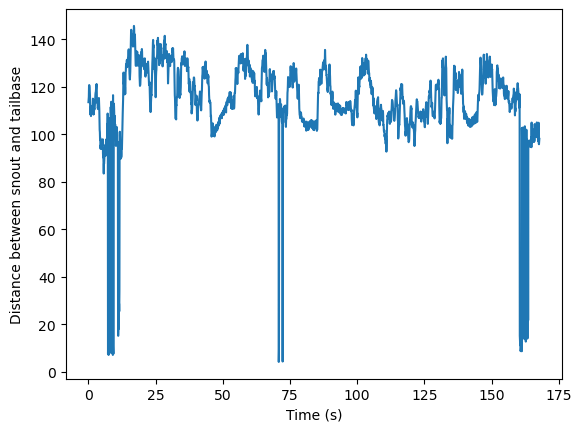

In [21]:
# distance over time
plt.plot(time, dist)
plt.xlabel('Time (s)')
plt.ylabel('Distance between ' + body_part1 + ' and ' + body_part2)
plt.show()

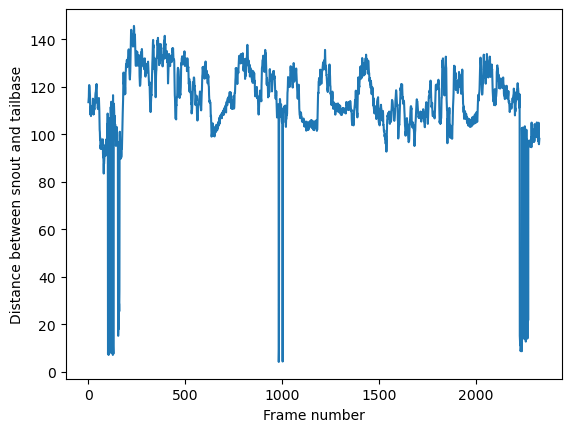

In [17]:
#distance over frames
plt.plot(dist)
plt.xlabel('Frame number')
plt.ylabel('Distance between ' + body_part1 + ' and ' + body_part2)
plt.show()


### Try out the same but with 2 individuals and our dataset (discrimination data)

In [245]:
dlc_output_ma = pd.read_hdf('discrimination_data.h5')

In [246]:
dlc_output_ma

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
0                                                      408.285    831.538   
1                                                      409.485    836.515   
2                                                      413.254    837.581   
3                                                      418.651    833.266   
4                                                      414.294    833.914   
...                                                        ...        ...   
4577                                                   758.655    312.516   
4578                                                   758.722    313.137   
4579                                                   761.500    313.493   
4580                                                   762.791    311.719   
4581                                                   761.459    304.178   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
0                  1.0  413.874  857.914        1.0  396.680  853.354   
1                  1.0  415.346  857.323        1.0  397.082  856.131   
2                  1.0  416.820  858.257        1.0  397.696  854.879   
3                  1.0  420.400  857.344        1.0  399.043  846.708   
4                  1.0  418.907  857.925        1.0  399.302  850.082   
...                ...      ...      ...        ...      ...      ...   
4577               1.0  747.942  329.695        1.0  738.043  316.328   
4578               1.0  751.125  330.742        1.0  743.423  316.804   
4579               1.0  755.464  330.627        1.0  748.148  317.507   
4580               1.0  759.351  330.591        1.0  749.139  318.803   
4581               1.0  760.060  330.616        1.0  748.068  315.304   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
0                  1.0  404.289  ...       1.000  407.081  226.773       1.00   
1                  1.0  403.348  ...       1.000  411.316  232.584       1.00   
2                  1.0  403.741  ...       1.000  415.114  235.650       1.00   
3                  1.0  406.615  ...       1.000  423.025  234.914       1.00   
4                  1.0  409.012  ...       1.000  427.253  232.340       1.00   
...                ...      ...  ...         ...      ...      ...        ...   
4577               1.0  744.183  ...       0.000      NaN      NaN       0.00   
4578               1.0  746.950  ...       0.999  202.526  746.134       0.83   
4579               1.0  740.320  ...       1.000  200.239  727.738       1.00   
4580               1.0  742.242  ...       1.000  193.362  722.142       1.00   
4581               1.0  746.298  ...       1.000  194.087  712.829       1.00   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
0            406.370  202.120        1.0  410.763  175.743      1.000  
1            410.386  205.796        1.0  414.274  179.297      1.000  
2            412.050  213.501        1.0  425.864  186.130      1.000  
3            426.211  206.26

In [247]:
# Select body parts to track
indiv1_bp1 = 'nose'
indiv1_bp2 = 'tailbase'
indiv2_bp1 = 'nose'
indiv2_bp2 = 'tailbase'

# Get position of each body part over time for each individual
indiv1_bp1_x = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp1]['x'].values
indiv1_bp1_y = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp1]['y'].values
indiv1_bp2_x = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp2]['x'].values
indiv1_bp2_y = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp2]['y'].values
indiv2_bp1_x = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp1]['x'].values
indiv2_bp1_y = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp1]['y'].values
indiv2_bp2_x = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp2]['x'].values
indiv2_bp2_y = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp2]['y'].values

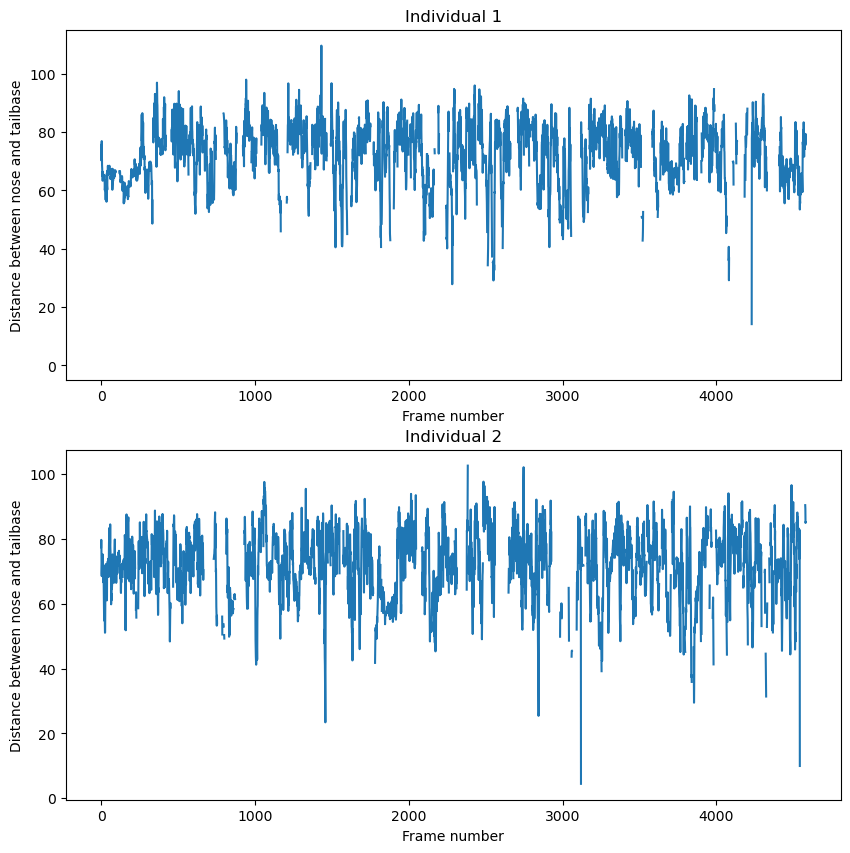

In [27]:


# Calculate distance between body parts over time for each individual
indiv1_dist = np.sqrt((indiv1_bp1_x - indiv1_bp2_x)**2 + (indiv1_bp1_y - indiv1_bp2_y)**2)
indiv2_dist = np.sqrt((indiv2_bp1_x - indiv2_bp2_x)**2 + (indiv2_bp1_y - indiv2_bp2_y)**2)

# Create a figure with two subplots for each individual
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot distance over time for individual 1
ax1.plot(indiv1_dist)
ax1.set_xlabel('Frame number')
ax1.set_ylabel('Distance between ' + indiv1_bp1 + ' and ' + indiv1_bp2)
ax1.set_title('Individual 1')

# Plot distance over time for individual 2
ax2.plot(indiv2_dist)
ax2.set_xlabel('Frame number')
ax2.set_ylabel('Distance between ' + indiv2_bp1 + ' and ' + indiv2_bp2)
ax2.set_title('Individual 2')

# Show the plot
plt.show()


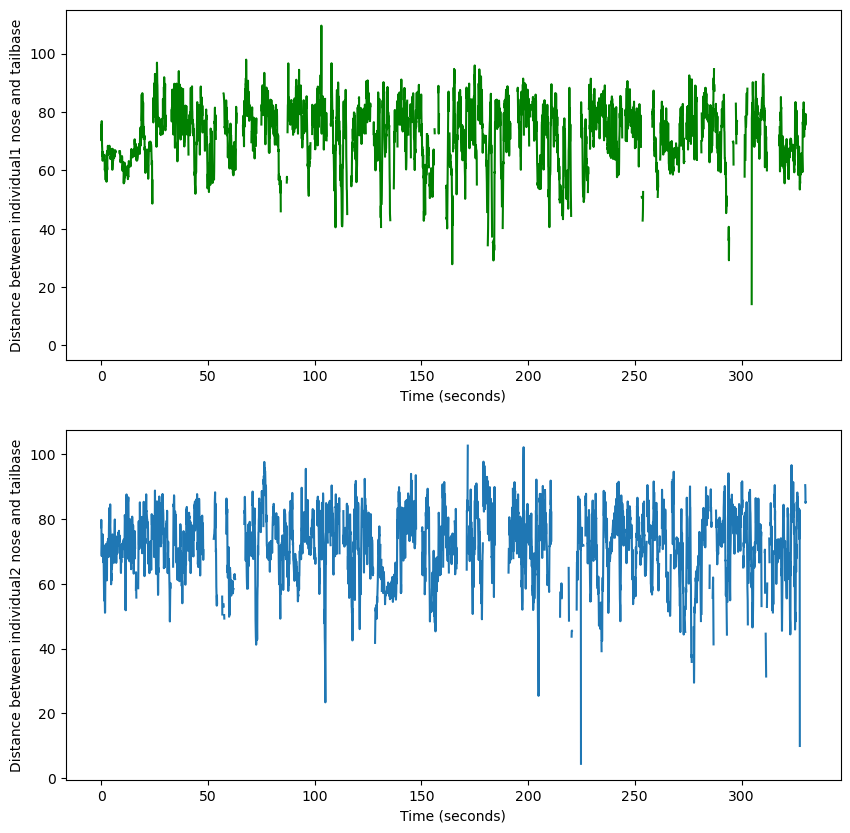

In [38]:
fps=13.88
time1 = np.arange(len(indiv1_dist)) / fps
time2 = np.arange(len(indiv2_dist)) / fps

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
#fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot distance over time for individual 1
ax1.plot(time1, indiv1_dist,'-g')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Distance between individual1 ' + indiv1_bp1 + ' and ' + indiv1_bp2)

# Plot distance over time for individual 2
ax2.plot(time2, indiv2_dist)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Distance between individual2 ' + indiv2_bp1 + ' and ' + indiv1_bp2)

# Set x-axis label
#plt.xlabel('Time (seconds)')

# Display plot
plt.show()

In [40]:
import seaborn as sns
sns.histplot(data=indiv1_dist)

In [43]:
pd.value_counts(indiv1_dist)

75.564878    1
66.117415    1
81.856820    1
80.102236    1
86.346918    1
            ..
85.254816    1
96.736702    1
89.521308    1
88.820033    1
76.113877    1
Length: 3572, dtype: int64

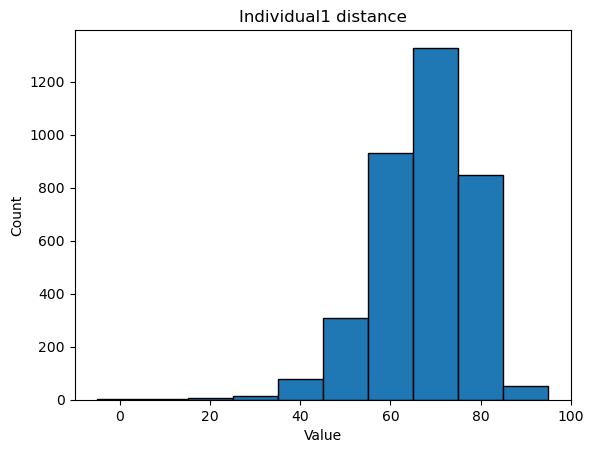

In [55]:
data = indiv1_dist

bins = np.arange(0, 101, 10)

# Calculate the histogram counts
counts, _ = np.histogram(data, bins=bins)

# Create a bar plot of the counts
plt.bar(bins[:-1], counts, width=10, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Individual1 distance')

# Display the plot

plt.show()


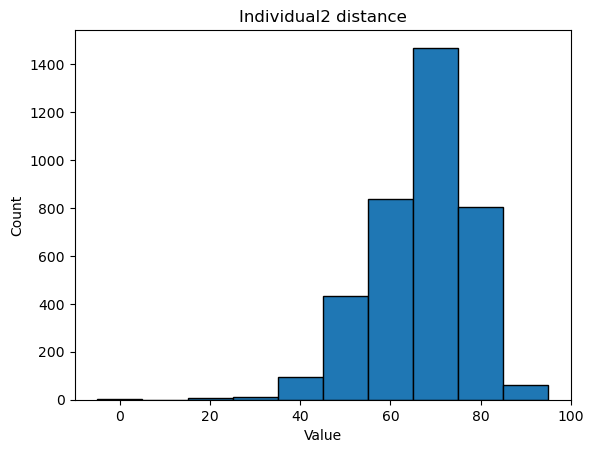

In [57]:
data = indiv2_dist

bins = np.arange(0, 101, 10)

# Calculate the histogram counts
counts, _ = np.histogram(data, bins=bins)

# Create a bar plot of the counts
plt.bar(bins[:-1], counts, width=10, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Individual2 distance')

# Display the plot
plt.show()

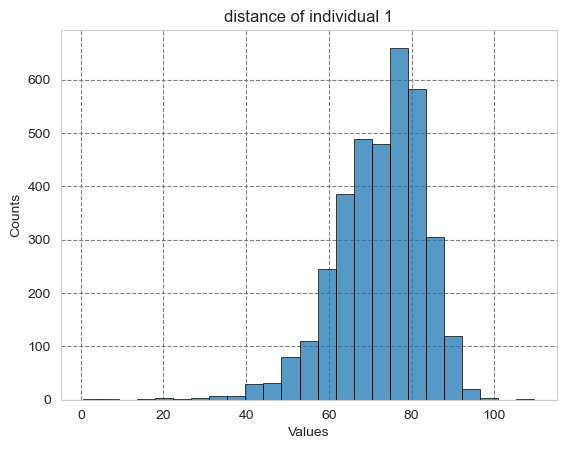

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data = indiv1_dist
# Define the bin edges
bins =25

sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.color': 'gray'})
# Create the histogram with thin lines

sns.histplot(data, bins=bins, kde=False, edgecolor='black', linewidth=0.5)

# Set the plot title and labels
plt.title('bodylength of individual 1')
plt.xlabel('bodylenght (in pixels)')
plt.ylabel('Counts')

# Show the plot
plt.show()


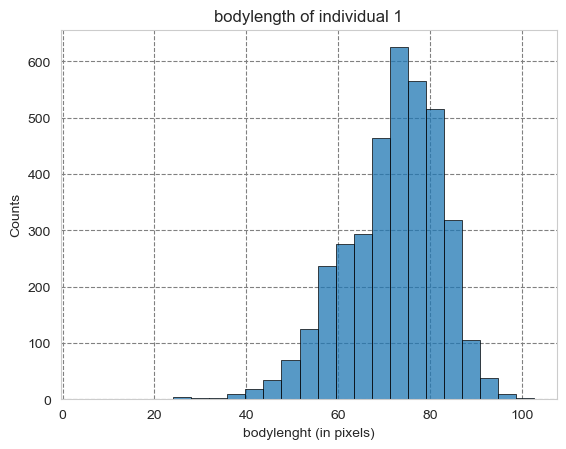

In [71]:

data = indiv2_dist

bins =25

sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.color': 'gray'})
# Create the histogram with thin lines

sns.histplot(data, bins=bins, kde=False, edgecolor='black', linewidth=0.5)

# Set the plot title and labels
plt.title('bodylength of individual 1')
plt.xlabel('bodylenght (in pixels)')
plt.ylabel('Counts')

# Show the plot
plt.show()


In [184]:
mean1=np.mean(indiv1_dist)
mean2=np.mean(indiv2_dist)

In [185]:
#categories:

range1=[mean1-10,mean1+10]
range2=[mean2-10, mean1+10]

In [186]:
# Determine the categories for each data point
categories1 = np.zeros(len(indiv1_dist))
for i in range(len(indiv1_dist)):
    if indiv1_dist[i] >= range1[0] and indiv1_dist[i] <= range1[1]:
        categories1[i] = 0 # normal posture
    elif indiv1_dist[i] > range1[1]:
        categories1[i] = 1 # elongated
    else:
        categories1[i] = -1 # shrunk

In [187]:
categories2 = np.zeros(len(indiv2_dist))
for i in range(len(indiv2_dist)):
    if indiv2_dist[i] >= range2[0] and indiv2_dist[i] <= range2[1]:
        categories2[i] = 0 # normal posture
    elif indiv2_dist[i] > range2[1]:
        categories2[i] = 1 # elongated
    else:
        categories2[i] = -1 # shrunk

In [188]:
# Count the number of data points in each category
normal1 = np.sum(categories1 == 0)
elongated1 = np.sum(categories1 == 1)
shrunk1 = np.sum(categories1 == -1)

normal2 = np.sum(categories2 == 0)
elongated2 = np.sum(categories2 == 1)
shrunk2 = np.sum(categories2 == -1)


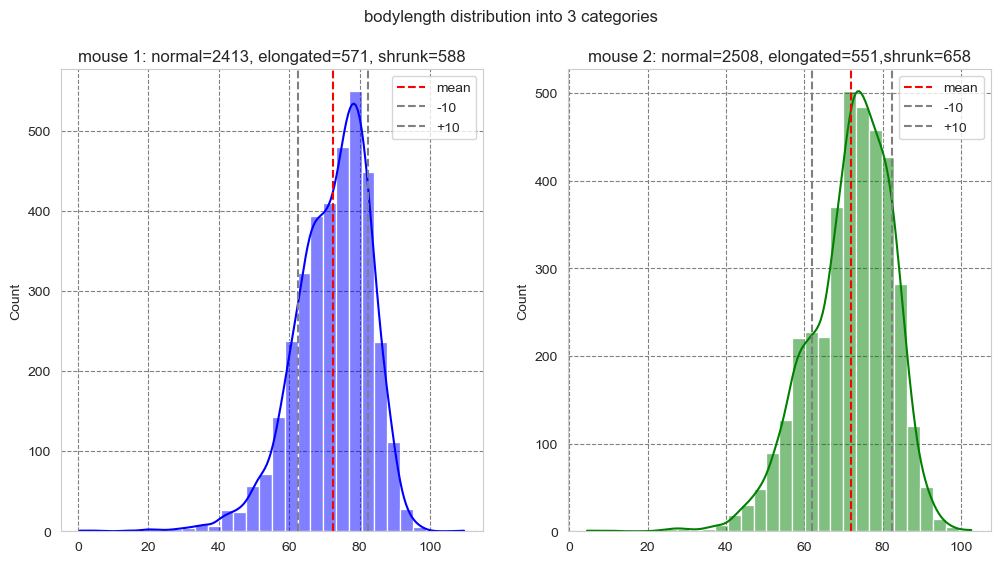

In [189]:

# Plot the histograms
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.histplot(data=indiv1_dist, bins=30, kde=True, color='blue', ax=axs[0])
sns.histplot(data=indiv2_dist, bins=30, kde=True, color='green', ax=axs[1])

axs[0].axvline(mean1, color='red', linestyle='--', label='mean')
axs[0].axvline(range1[0], color='gray', linestyle='--', label='-10')
axs[0].axvline(range1[1], color='gray', linestyle='--', label='+10')
axs[0].legend()

axs[1].axvline(mean2, color='red', linestyle='--', label='mean')
axs[1].axvline(range2[0], color='gray', linestyle='--', label='-10')
axs[1].axvline(range2[1], color='gray', linestyle='--', label='+10')
axs[1].legend()

fig.suptitle('bodylength distribution into 3 categories')
axs[0].set_title(f'mouse 1: normal={normal1}, elongated={elongated1}, shrunk={shrunk1}')
axs[1].set_title(f'mouse 2: normal={normal2}, elongated={elongated2},shrunk={shrunk2}')

plt.show()


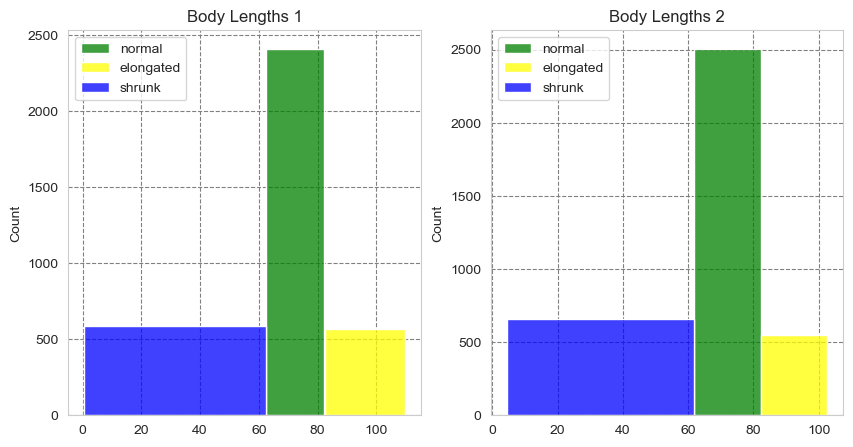

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=indiv1_dist[categories1==0], bins=1, ax=axs[0], color='green', label='normal')
sns.histplot(data=indiv1_dist[categories1==1], bins=1, ax=axs[0], color='yellow', label='elongated')
sns.histplot(data=indiv1_dist[categories1==-1], bins=1, ax=axs[0], color='blue', label='shrunk')
axs[0].set_title('Body Lengths 1')
axs[0].legend()

sns.histplot(data=indiv2_dist[categories2==0], bins=1, ax=axs[1], color='green', label='normal')
sns.histplot(data=indiv2_dist[categories2==1], bins=1, ax=axs[1], color='yellow', label='elongated')
sns.histplot(data=indiv2_dist[categories2==-1], bins=1, ax=axs[1], color='blue', label='shrunk')
axs[1].set_title('Body Lengths 2')
axs[1].legend()

plt.show()


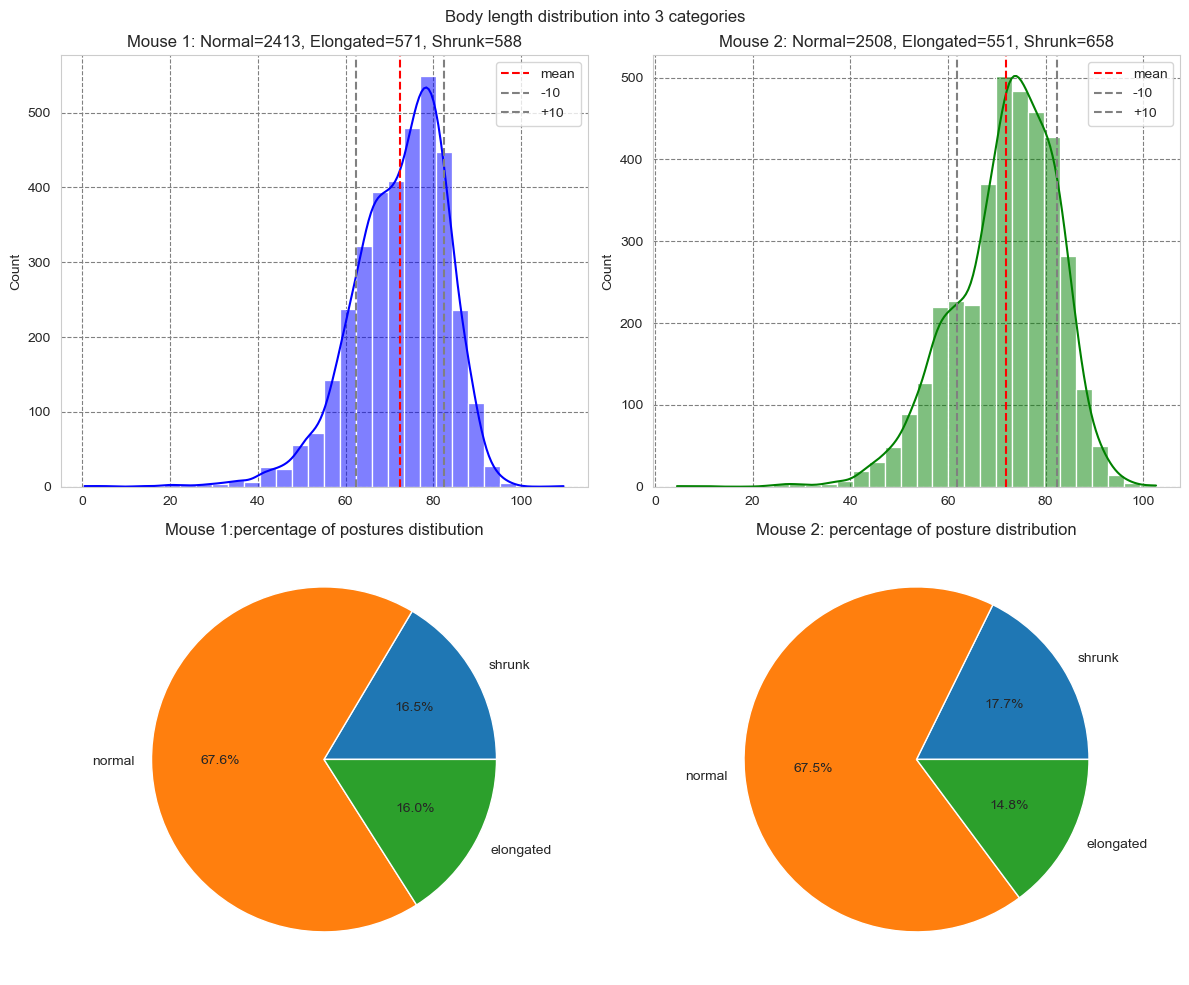

In [242]:
# Plot the histograms

# Count the number of data points in each category
normal1 = np.sum(categories1 == 0)
elongated1 = np.sum(categories1 == 1)
shrunk1 = np.sum(categories1 == -1)

normal2 = np.sum(categories2 == 0)
elongated2 = np.sum(categories2 == 1)
shrunk2 = np.sum(categories2 == -1)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

sns.histplot(data=indiv1_dist, bins=30, kde=True, color='blue', ax=axs[0,0])
sns.histplot(data=indiv2_dist, bins=30, kde=True, color='green', ax=axs[0,1])

axs[0,0].axvline(mean1, color='red', linestyle='--', label='mean')
axs[0,0].axvline(range1[0], color='gray', linestyle='--', label='-10')
axs[0,0].axvline(range1[1], color='gray', linestyle='--', label='+10')
axs[0,0].legend()

axs[0,1].axvline(mean2, color='red', linestyle='--', label='mean')
axs[0,1].axvline(range2[0], color='gray', linestyle='--', label='-10')
axs[0,1].axvline(range2[1], color='gray', linestyle='--', label='+10')
axs[0,1].legend()

fig.suptitle('Body length distribution into 3 categories')
axs[0,0].set_title(f'Mouse 1: Normal={normal1}, Elongated={elongated1}, Shrunk={shrunk1}')
axs[0,1].set_title(f'Mouse 2: Normal={normal2}, Elongated={elongated2}, Shrunk={shrunk2}')

# Plot the percentages
pie1=pd.DataFrame({'shrunk':[shrunk1/(shrunk1+elongated1+normal1)*100],'normal':[normal1/(shrunk1+elongated1+normal1)*100],'elongated':[elongated1/(shrunk1+elongated1+normal1)*100]})
pie1=pie1.melt()
axs[1,0].pie(pie1['value'], labels=pie1['variable'], autopct='%1.1f%%')

pie2=pd.DataFrame({'shrunk':[shrunk2/(shrunk2+elongated2+normal2)*100],'normal':[normal2/(shrunk2+elongated2+normal2)*100],'elongated':[elongated2/(shrunk2+elongated2+normal2)*100]})
pie2=pie2.melt()
axs[1,1].pie(pie2['value'], labels=pie2['variable'], autopct='%1.1f%%')

axs[1,0].set_title('Mouse 1:percentage of postures distibution')
axs[1,1].set_title('Mouse 2: percentage of posture distribution')

plt.tight_layout()
plt.show()


,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


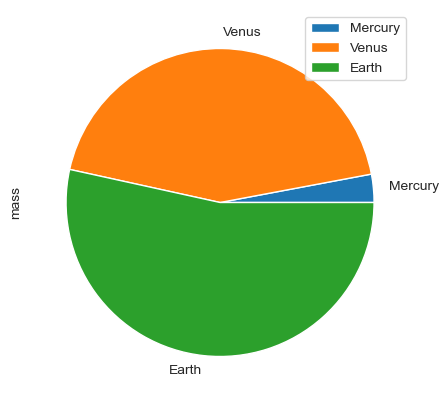

In [210]:
random = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = random.plot.pie(y='mass', figsize=(5, 5))
random

In [238]:
pie1=pd.DataFrame({'shrunk':[shrunk1/(shrunk1+elongated1+normal1)*100],'normal':[normal1/(shrunk1+elongated1+normal1)*100],'elongated':[elongated1/(shrunk1+elongated1+normal1)*100]})
pie1=pie1.melt()
#pie1=pie1.iloc[:-1,:]


In [239]:
pie1

,variable,value
0,shrunk,16.461366
1,normal,67.553191
2,elongated,15.985442


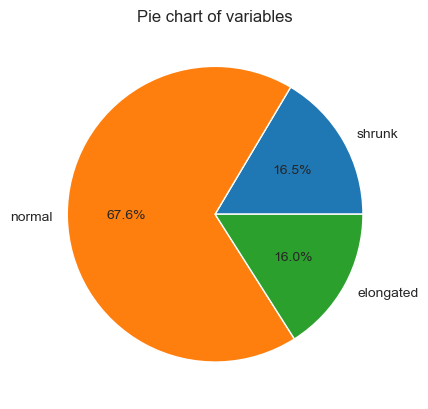

In [237]:
plt.pie(pie1['value'], labels=pie1['variable'], autopct='%1.1f%%')

# add a title
plt.title('Posture percentages')

# display the plot
plt.show()

In [223]:
pie1=pd.DataFrame({'shrunk':[shrunk1],'normal':[normal1],'elongated':[elongated1],'total':[shrunk1+elongated1+normal1]})
pie2=pd.DataFrame({'shrunk':[shrunk2],'normal':[normal2],'elongated':[elongated2],'total':[shrunk2+elongated2+normal2]})



pie1.plot.pie(y='value',ax=axs[1,0])
pie2.plot.pie(y='shrunk',ax=axs[1,1])

KeyError: 'value'

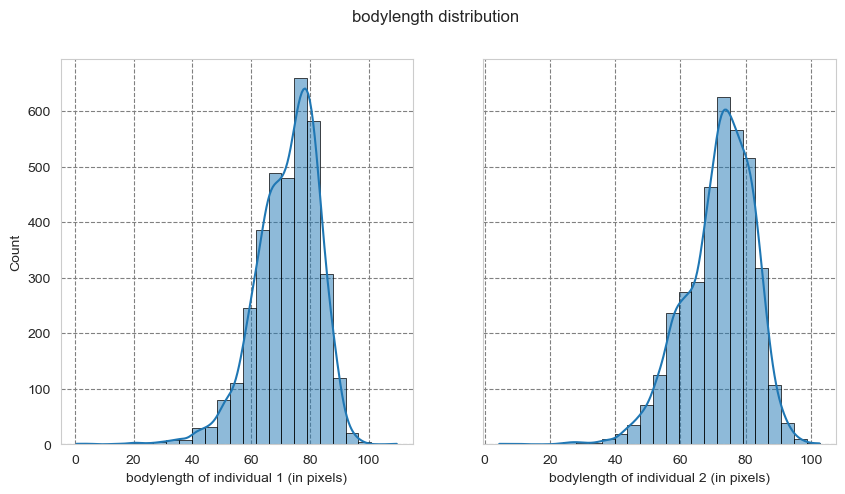

In [102]:
data1 = indiv1_dist
data2 = indiv2_dist

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),sharey=True)

# Plot the first dataset on the first subplot
sns.histplot(data1,bins=25, ax=ax1, kde=True,edgecolor='black', linewidth=0.5)
ax1.set_xlabel('bodylength of individual 1 (in pixels)')

# Plot the second dataset on the second subplot
sns.histplot(data2,bins=25, ax=ax2, kde=True,edgecolor='black', linewidth=0.5)
ax2.set_xlabel('bodylength of individual 2 (in pixels)')

fig.suptitle('bodylength distribution', ha='center')
plt.show()


In [90]:
np.mean(indiv1_dist, dtype=np.float64)

nan

In [88]:
indiv1_dist.dtype

dtype('float64')

In [94]:
indiv1_dist = indiv1_dist[~np.isnan(indiv1_dist)]
indiv2_dist= indiv2_dist[~np.isnan(indiv2_dist)]

In [95]:
mean = np.mean(indiv1_dist, dtype=np.float64)
print(mean)

72.36152329928593


In [96]:
mean2 = np.mean(indiv2_dist, dtype=np.float64)
print(mean2)

71.83740594742733


## Posture recognition 
#### differentiate postures of the mice based on 3 point (nose-middle of the spine (spine2) and tailbase)
#### this will help to differentiate and identify behaviour features

Since the body can be bent and shrunk as well I want to take that into account so we will calculate the angle between the nose : P1(x1,y1), the middle of the spine :P2(x2,y2), and tailbase P3(x3,y3) to see if there is any significant angle between them or the body of the mouse is just shrunk

In [124]:
dlc_output_ma=dlc_output_ma.dropna()

In [126]:
dlc_output_ma

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
0                                                      408.285    831.538   
1                                                      409.485    836.515   
2                                                      413.254    837.581   
3                                                      418.651    833.266   
4                                                      414.294    833.914   
...                                                        ...        ...   
4540                                                   632.211    304.054   
4541                                                   631.699    303.972   
4542                                                   630.559    305.833   
4580                                                   762.791    311.719   
4581                                                   761.459    304.178   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
0                  1.0  413.874  857.914        1.0  396.680  853.354   
1                  1.0  415.346  857.323        1.0  397.082  856.131   
2                  1.0  416.820  858.257        1.0  397.696  854.879   
3                  1.0  420.400  857.344        1.0  399.043  846.708   
4                  1.0  418.907  857.925        1.0  399.302  850.082   
...                ...      ...      ...        ...      ...      ...   
4540               1.0  632.273  314.875        1.0  615.814  305.934   
4541               1.0  633.160  314.542        1.0  615.585  306.582   
4542               1.0  632.566  315.788        1.0  614.492  308.239   
4580               1.0  759.351  330.591        1.0  749.139  318.803   
4581               1.0  760.060  330.616        1.0  748.068  315.304   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
0                  1.0  404.289  ...         1.0  407.081  226.773        1.0   
1                  1.0  403.348  ...         1.0  411.316  232.584        1.0   
2                  1.0  403.741  ...         1.0  415.114  235.650        1.0   
3                  1.0  406.615  ...         1.0  423.025  234.914        1.0   
4                  1.0  409.012  ...         1.0  427.253  232.340        1.0   
...                ...      ...  ...         ...      ...      ...        ...   
4540               1.0  619.206  ...         1.0  393.483  716.366        1.0   
4541               1.0  619.647  ...         1.0  382.074  732.386        1.0   
4542               1.0  618.632  ...         1.0  376.398  740.729        1.0   
4580               1.0  742.242  ...         1.0  193.362  722.142        1.0   
4581               1.0  746.298  ...         1.0  194.087  712.829        1.0   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
0            406.370  202.120        1.0  410.763  175.743      1.000  
1            410.386  205.796        1.0  414.274  179.297      1.000  
2            412.050  213.501        1.0  425.864  186.130      1.000  
3            426.211  206.26

In [152]:
#NOSE-SPINE-TAILBASE x-y coordinates
P1 = 'shoulder'
P2='spine2'
P3 = 'tailend'


x1 = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][P1]['x'].values
y1= dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][P1]['y'].values
x2 = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][P2]['x'].values
y2= dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][P2]['y'].values
x3 = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][P3]['x'].values
y3 = dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][P3]['y'].values

In [153]:
# vectors: a, b

a=np.sqrt((x2 - x1)**2 + (y1 - y2)**2)
b=np.sqrt((x3 - x2)**2 + (y2 - y3)**2)

In [154]:
cosinus=((x2-x1)*(x3-x2)+(y2-y1)*(y3-y2))/(a*b)

In [155]:
angle=np.arccos(cosinus)
angle

array([0.00769704, 0.12761406, 0.18051899, ..., 0.11265423, 0.38145181,
       0.22007449])

In [156]:
np.max(angle)

2.6707288932906232

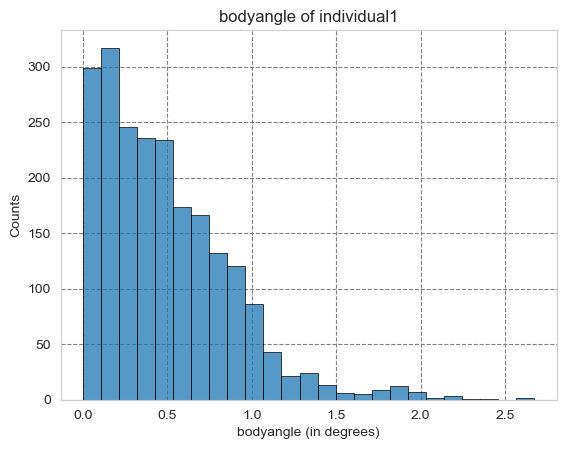

In [158]:
data = angle

bins =25

sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.color': 'gray'})
# Create the histogram with thin lines

sns.histplot(data, bins=bins, kde=False, edgecolor='black', linewidth=0.5)

# Set the plot title and labels
plt.title('bodyangle of individual1')
plt.xlabel('bodyangle (in degrees)')
plt.ylabel('Counts')

# Show the plot
plt.show()


### Frobenius distance (Euclidian norm between matrixes)

In [250]:
dlc_output_ma=dlc_output_ma.dropna()
dlc_output_ma

scorer      DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000           \
individuals                                          individual1            
bodyparts                                                   nose            
coords                                                         x        y   
0                                                      408.285    831.538   
1                                                      409.485    836.515   
2                                                      413.254    837.581   
3                                                      418.651    833.266   
4                                                      414.294    833.914   
...                                                        ...        ...   
4540                                                   632.211    304.054   
4541                                                   631.699    303.972   
4542                                                   630.559    305.833   
4580                                                   762.791    311.719   
4581                                                   761.459    304.178   

scorer                                                                 \
individuals                                                             
bodyparts              rightear                      leftear            
coords      likelihood        x        y likelihood        x        y   
0                  1.0  413.874  857.914        1.0  396.680  853.354   
1                  1.0  415.346  857.323        1.0  397.082  856.131   
2                  1.0  416.820  858.257        1.0  397.696  854.879   
3                  1.0  420.400  857.344        1.0  399.043  846.708   
4                  1.0  418.907  857.925        1.0  399.302  850.082   
...                ...      ...      ...        ...      ...      ...   
4540               1.0  632.273  314.875        1.0  615.814  305.934   
4541               1.0  633.160  314.542        1.0  615.585  306.582   
4542               1.0  632.566  315.788        1.0  614.492  308.239   
4580               1.0  759.351  330.591        1.0  749.139  318.803   
4581               1.0  760.060  330.616        1.0  748.068  315.304   

scorer                           ...                                           \
individuals                      ... individual2                                
bodyparts              shoulder  ...    tailbase    tail1                       
coords      likelihood        x  ...  likelihood        x        y likelihood   
0                  1.0  404.289  ...         1.0  407.081  226.773        1.0   
1                  1.0  403.348  ...         1.0  411.316  232.584        1.0   
2                  1.0  403.741  ...         1.0  415.114  235.650        1.0   
3                  1.0  406.615  ...         1.0  423.025  234.914        1.0   
4                  1.0  409.012  ...         1.0  427.253  232.340        1.0   
...                ...      ...  ...         ...      ...      ...        ...   
4540               1.0  619.206  ...         1.0  393.483  716.366        1.0   
4541               1.0  619.647  ...         1.0  382.074  732.386        1.0   
4542               1.0  618.632  ...         1.0  376.398  740.729        1.0   
4580               1.0  742.242  ...         1.0  193.362  722.142        1.0   
4581               1.0  746.298  ...         1.0  194.087  712.829        1.0   

scorer                                                                 
individuals                                                            
bodyparts      tail2                      tailend                      
coords             x        y likelihood        x        y likelihood  
0            406.370  202.120        1.0  410.763  175.743      1.000  
1            410.386  205.796        1.0  414.274  179.297      1.000  
2            412.050  213.501        1.0  425.864  186.130      1.000  
3            426.211  206.26

In [251]:
indiv1_bp1 = 'nose'
indiv1_bp2 = 'tailbase'
indiv2_bp1 = 'nose'
indiv2_bp2 = 'tailbase'

# Get position of each body part over time for each individual
mouse1_nose= dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp1][['x','y']].values
mouse1_tailbase=dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv1_bp1][['x','y']].values
mouse2_nose= dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual2'][indiv2_bp1][['x','y']].values
mouse2_tailbase=dlc_output_ma['DLC_resnet50_muscimol_male_maDLCMar20shuffle1_100000']['individual1'][indiv2_bp2][['x','y']].values


In [255]:
mouse1_nose
mouse2_nose

array([[402.065, 330.928],
       [398.109, 334.227],
       [393.051, 331.108],
       ...,
       [300.567, 806.058],
       [189.161, 618.496],
       [187.636, 607.117]])

In [256]:
frobenius_distance = np.linalg.norm(mouse1_nose - mouse2_nose, ord='fro')

print(frobenius_distance)

24728.220180454275


In [261]:
fps=13.88
b=2*fps

27.76